In [7]:
import os
from PIL import Image
import util.image_import as ii
from glob import glob
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import backend as K
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, RMSprop, SGD
from util.plots import plot_history
from util.data_generator import make_data_generator
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Trick to configure gpu memory dynamically

In [8]:
cfg = K.tf.ConfigProto() # Config to dynamically add memory
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))# set this TensorFlow session as the default session for Keras.

### Making generators

In [9]:
batch_size = 32
train_path = '../dataset3/res_still/train'
test_path = '../dataset3/res_still/test'
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=False)

No correct transfer learning found. Using subtract mean as preprocessing function
Found 1875 images belonging to 8 classes.
Found 472 images belonging to 8 classes.


In [10]:
model_optimized = Sequential()
model_optimized.add(Flatten(input_shape=(224,224,3)))
model_optimized.add(Dense(64))
model_optimized.add(Activation('relu'))
model_optimized.add(Dense(8))
model_optimized.add(Activation('softmax'))
model_optimized.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr=1e-4),
                        metrics=['accuracy'])

model_optimized.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                9633856   
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
activation_4 (Activation)    (None, 8)                 0         
Total params: 9,634,376
Trainable params: 9,634,376
Non-trainable params: 0
_________________________________________________________________


### All classes with both types of catfood

In [11]:
# Checkpoint to save best model
file_path = 'saved_models/fcn_all_classes.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]

In [12]:
history_optimized = model_optimized.fit_generator(
                    train_generator,
                    steps_per_epoch=1875 // batch_size,
                    epochs=150,
                    validation_data=test_generator,
                    validation_steps=472 // batch_size,
                    workers=2,
                    callbacks=callback_list)


Epoch 1/150
58/58 [==============================] - 34s 584ms/step - loss: 2.4313 - acc: 0.1755 - val_loss: 1.8254 - val_acc: 0.3527

Epoch 00001: val_acc improved from -inf to 0.35268, saving model to saved_models/fcn_all_classes.e01-a0.35.hdf5
Epoch 2/150
58/58 [==============================] - 35s 598ms/step - loss: 2.2033 - acc: 0.2084 - val_loss: 1.6362 - val_acc: 0.4286

Epoch 00002: val_acc improved from 0.35268 to 0.42857, saving model to saved_models/fcn_all_classes.e02-a0.43.hdf5
Epoch 3/150
58/58 [==============================] - 35s 605ms/step - loss: 1.9991 - acc: 0.2908 - val_loss: 1.5548 - val_acc: 0.4397

Epoch 00003: val_acc improved from 0.42857 to 0.43973, saving model to saved_models/fcn_all_classes.e03-a0.44.hdf5
Epoch 4/150
58/58 [==============================] - 38s 648ms/step - loss: 1.9663 - acc: 0.3054 - val_loss: 1.4578 - val_acc: 0.4531

Epoch 00004: val_acc improved from 0.43973 to 0.45312, saving model to saved_models/fcn_all_classes.e04-a0.45.hdf5
Epo

Epoch 38/150
58/58 [==============================] - 39s 672ms/step - loss: 0.9494 - acc: 0.6255 - val_loss: 0.6351 - val_acc: 0.7589

Epoch 00038: val_acc did not improve from 0.78348
Epoch 39/150
58/58 [==============================] - 40s 694ms/step - loss: 0.9723 - acc: 0.6483 - val_loss: 0.6608 - val_acc: 0.7411

Epoch 00039: val_acc did not improve from 0.78348
Epoch 40/150
58/58 [==============================] - 41s 700ms/step - loss: 0.9348 - acc: 0.6639 - val_loss: 0.6063 - val_acc: 0.7768

Epoch 00040: val_acc did not improve from 0.78348
Epoch 41/150
58/58 [==============================] - 37s 646ms/step - loss: 0.9399 - acc: 0.6410 - val_loss: 0.5815 - val_acc: 0.7857

Epoch 00041: val_acc improved from 0.78348 to 0.78571, saving model to saved_models/fcn_all_classes.e41-a0.79.hdf5
Epoch 42/150
58/58 [==============================] - 37s 636ms/step - loss: 0.9027 - acc: 0.6633 - val_loss: 0.5976 - val_acc: 0.7991

Epoch 00042: val_acc improved from 0.78571 to 0.79911, 


Epoch 00079: val_acc did not improve from 0.84152
Epoch 80/150
58/58 [==============================] - 39s 671ms/step - loss: 0.6856 - acc: 0.7484 - val_loss: 0.5096 - val_acc: 0.8482

Epoch 00080: val_acc improved from 0.84152 to 0.84821, saving model to saved_models/fcn_all_classes.e80-a0.85.hdf5
Epoch 81/150
58/58 [==============================] - 38s 652ms/step - loss: 0.6546 - acc: 0.7413 - val_loss: 0.5009 - val_acc: 0.8326

Epoch 00081: val_acc did not improve from 0.84821
Epoch 82/150
58/58 [==============================] - 38s 659ms/step - loss: 0.6833 - acc: 0.7328 - val_loss: 0.5001 - val_acc: 0.8281

Epoch 00082: val_acc did not improve from 0.84821
Epoch 83/150
58/58 [==============================] - 39s 674ms/step - loss: 0.6621 - acc: 0.7540 - val_loss: 0.4979 - val_acc: 0.8393

Epoch 00083: val_acc did not improve from 0.84821
Epoch 84/150
58/58 [==============================] - 40s 692ms/step - loss: 0.6752 - acc: 0.7408 - val_loss: 0.4811 - val_acc: 0.8348

Epoc

58/58 [==============================] - 37s 641ms/step - loss: 0.5770 - acc: 0.7870 - val_loss: 0.4709 - val_acc: 0.8371

Epoch 00122: val_acc did not improve from 0.86607
Epoch 123/150
58/58 [==============================] - 38s 652ms/step - loss: 0.5251 - acc: 0.7968 - val_loss: 0.4311 - val_acc: 0.8616

Epoch 00123: val_acc did not improve from 0.86607
Epoch 124/150
58/58 [==============================] - 38s 659ms/step - loss: 0.5511 - acc: 0.7992 - val_loss: 0.4271 - val_acc: 0.8683

Epoch 00124: val_acc improved from 0.86607 to 0.86830, saving model to saved_models/fcn_all_classes.e124-a0.87.hdf5
Epoch 125/150
58/58 [==============================] - 39s 668ms/step - loss: 0.5578 - acc: 0.7958 - val_loss: 0.4035 - val_acc: 0.8594

Epoch 00125: val_acc did not improve from 0.86830
Epoch 126/150
58/58 [==============================] - 38s 662ms/step - loss: 0.5168 - acc: 0.7996 - val_loss: 0.4183 - val_acc: 0.8504

Epoch 00126: val_acc did not improve from 0.86830
Epoch 127/150

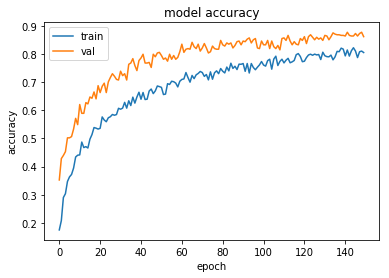

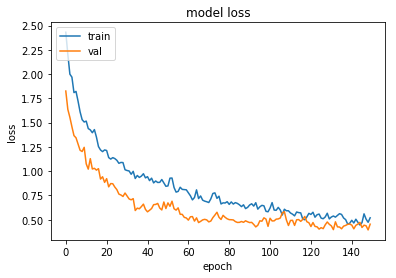

In [13]:
plot_history(history_optimized, save=True, path='nets/feedforward/', name='fcn_all_classes')

### Not trained on catfood_beef
* Catfood beef and catfood salmon is in some picture identical so it is not possible to differentiate between the two classes, thus a model is trained without catfood beef

In [14]:
batch_size = 32
train_path = '../dataset3/res_still/train'
test_path = '../dataset3/res_still/test'
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=True, ignore=['catfood_beef'])

No correct transfer learning found. Using subtract mean as preprocessing function
Found Training 1641 images belonging to 7 classes
Found Test 413 images belonging to 7 classes


In [15]:
model_optimized = Sequential()
model_optimized.add(Flatten(input_shape=(224,224,3)))
model_optimized.add(Dense(64))
model_optimized.add(Activation('relu'))
model_optimized.add(Dense(7))
model_optimized.add(Activation('softmax'))
model_optimized.compile(loss='categorical_crossentropy',
                        optimizer=Adam(lr=1e-4),
                        metrics=['accuracy'])

model_optimized.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                9633856   
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 455       
_________________________________________________________________
activation_6 (Activation)    (None, 7)                 0         
Total params: 9,634,311
Trainable params: 9,634,311
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Checkpoint to save best model
file_path = 'saved_models/fcn_without_catbeef.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]

In [17]:
history = model_optimized.fit_generator(
            train_generator,
            steps_per_epoch=1641 // batch_size,
            epochs=150,
            validation_data=test_generator,
            validation_steps=413 // batch_size,
            workers=2,
            callbacks=callback_list)

Epoch 1/150
51/51 [==============================] - 18s 348ms/step - loss: 2.1868 - acc: 0.2188 - val_loss: 1.5510 - val_acc: 0.3932

Epoch 00001: val_acc improved from -inf to 0.39323, saving model to saved_models/fcn_without_catbeef.e01-a0.39.hdf5
Epoch 2/150
51/51 [==============================] - 17s 336ms/step - loss: 2.0015 - acc: 0.2838 - val_loss: 1.3408 - val_acc: 0.4948

Epoch 00002: val_acc improved from 0.39323 to 0.49479, saving model to saved_models/fcn_without_catbeef.e02-a0.49.hdf5
Epoch 3/150
51/51 [==============================] - 17s 327ms/step - loss: 1.8413 - acc: 0.3199 - val_loss: 1.2565 - val_acc: 0.5469

Epoch 00003: val_acc improved from 0.49479 to 0.54688, saving model to saved_models/fcn_without_catbeef.e03-a0.55.hdf5
Epoch 4/150
51/51 [==============================] - 17s 340ms/step - loss: 1.6872 - acc: 0.3840 - val_loss: 1.1497 - val_acc: 0.5677

Epoch 00004: val_acc improved from 0.54688 to 0.56771, saving model to saved_models/fcn_without_catbeef.e0

51/51 [==============================] - 16s 318ms/step - loss: 0.7228 - acc: 0.7414 - val_loss: 0.5115 - val_acc: 0.8073

Epoch 00037: val_acc did not improve from 0.81250
Epoch 38/150
51/51 [==============================] - 18s 351ms/step - loss: 0.7638 - acc: 0.7321 - val_loss: 0.5169 - val_acc: 0.8229

Epoch 00038: val_acc improved from 0.81250 to 0.82292, saving model to saved_models/fcn_without_catbeef.e38-a0.82.hdf5
Epoch 39/150
51/51 [==============================] - 17s 332ms/step - loss: 0.7539 - acc: 0.7367 - val_loss: 0.5204 - val_acc: 0.8099

Epoch 00039: val_acc did not improve from 0.82292
Epoch 40/150
51/51 [==============================] - 18s 348ms/step - loss: 0.6598 - acc: 0.7441 - val_loss: 0.5392 - val_acc: 0.8021

Epoch 00040: val_acc did not improve from 0.82292
Epoch 41/150
51/51 [==============================] - 18s 345ms/step - loss: 0.6492 - acc: 0.7640 - val_loss: 0.5055 - val_acc: 0.8229

Epoch 00041: val_acc did not improve from 0.82292
Epoch 42/150
5

51/51 [==============================] - 17s 330ms/step - loss: 0.4792 - acc: 0.8320 - val_loss: 0.4430 - val_acc: 0.8672

Epoch 00078: val_acc did not improve from 0.87760
Epoch 79/150
51/51 [==============================] - 18s 349ms/step - loss: 0.5129 - acc: 0.8168 - val_loss: 0.4192 - val_acc: 0.8646

Epoch 00079: val_acc did not improve from 0.87760
Epoch 80/150
51/51 [==============================] - 17s 325ms/step - loss: 0.5105 - acc: 0.8253 - val_loss: 0.4167 - val_acc: 0.8646

Epoch 00080: val_acc did not improve from 0.87760
Epoch 81/150
51/51 [==============================] - 17s 334ms/step - loss: 0.5297 - acc: 0.8205 - val_loss: 0.4060 - val_acc: 0.8594

Epoch 00081: val_acc did not improve from 0.87760
Epoch 82/150
51/51 [==============================] - 17s 340ms/step - loss: 0.5026 - acc: 0.8121 - val_loss: 0.3614 - val_acc: 0.8828

Epoch 00082: val_acc improved from 0.87760 to 0.88281, saving model to saved_models/fcn_without_catbeef.e82-a0.88.hdf5
Epoch 83/150
5

51/51 [==============================] - 18s 361ms/step - loss: 0.4115 - acc: 0.8602 - val_loss: 0.3427 - val_acc: 0.9010

Epoch 00119: val_acc did not improve from 0.90625
Epoch 120/150
51/51 [==============================] - 17s 340ms/step - loss: 0.4483 - acc: 0.8525 - val_loss: 0.3408 - val_acc: 0.9010

Epoch 00120: val_acc did not improve from 0.90625
Epoch 121/150
51/51 [==============================] - 18s 361ms/step - loss: 0.3655 - acc: 0.8688 - val_loss: 0.3089 - val_acc: 0.8984

Epoch 00121: val_acc did not improve from 0.90625
Epoch 122/150
51/51 [==============================] - 17s 341ms/step - loss: 0.3385 - acc: 0.8885 - val_loss: 0.3210 - val_acc: 0.8984

Epoch 00122: val_acc did not improve from 0.90625
Epoch 123/150
51/51 [==============================] - 17s 337ms/step - loss: 0.3396 - acc: 0.8768 - val_loss: 0.3093 - val_acc: 0.9010

Epoch 00123: val_acc did not improve from 0.90625
Epoch 124/150
51/51 [==============================] - 18s 348ms/step - loss: 0

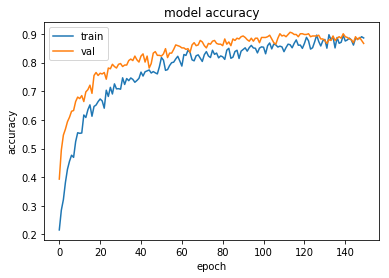

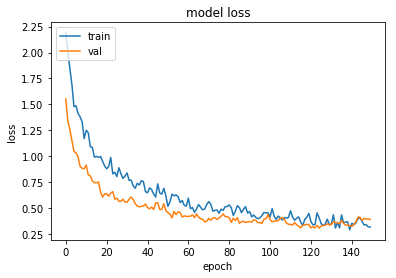

In [18]:
plot_history(history, save=True, path='nets/feedforward/', name='fcn_without_catbeef')

The above training on all classes and training without catfood beef is summurized below:

|Summarize             | Epoch | Training Loss | Training Accuracy | Validation Loss | Validation Accuracy |
|:--------------------:|:-----:|:-------------:|:-----------------:|:---------------:|:-------------------:|
| All Classes          |  142  |     0.4682    |      0.8153       |      0.4063     |        0.8772       |
| Without catfood beef |  114  |     0.3972    |      0.8645       |      0.3383     |        0.9062       |

The results is the best achieved validation accuracy with the respectivly training accuracy. 
<span style="color:red"> Conlclude on these</span>